# Dependencies

In [9]:
import os
import matplotlib.pyplot as plt
from matplotlib import rcParams
from mpl_toolkits.axes_grid1.inset_locator import InsetPosition

import seaborn as sns

from datacollect import *

# Config

In [10]:
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 10
cm = 1 / 2.54

# Input parameters

In [11]:
# Dataset
year = 2018

# Input Dir (Simulations)
path_simulation = f'/Users/kristianboerger/working_files/ledsa/simulation/2018/'
# Input Dir (MIREX)
path_mirex = '/Users/kristianboerger/working_files/ledsa/MIREX'
# Image Dir
path_images = '/Users/kristianboerger/working_files/ledsa/image_data/V001/Cam_01'

# Experimental Data
experiment = 'V001' # relevant for MIREX data
simulation = 'V001' # relevant for simulation data

# Get data

In [12]:
path_cam_01 = os.path.join(path_simulation, simulation, 'Cam_01')
path_cam_02 = os.path.join(path_simulation, simulation, 'Cam_02')
mirex_file = os.path.join(path_mirex, f'{year}_{experiment}.dat')

sim_cam01 = SimData(path_cam_01)
sim_cam02 = SimData(path_cam_02)
mirex_data = MirexData(mirex_file)

image_data = ImageData(path_images, path_cam_01)

# Plot LED intensites

## At line, timestep (height x intensity) --> 2D

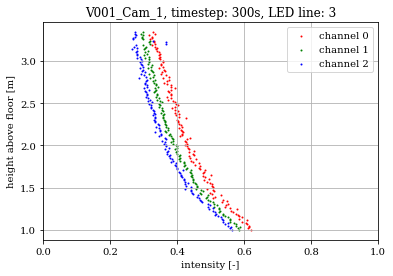

In [13]:
line = 3 # LED line
window_sim = 1 # Average window
n_ref = 10 # Number of reference images for normalizing
timestep = 300 # Timestep to analyse
cam = 1 # Data from cam

if cam == 1:
    sim_data = sim_cam01
elif cam == 2:
    sim_data = sim_cam02

extco_red = sim_cam01.get_ledparams_at_line(0,line,window=window_sim,n_ref=n_ref, yaxis='height').loc[timestep, :]
extco_green = sim_cam01.get_ledparams_at_line(1,line,window=window_sim,n_ref=n_ref, yaxis='height').loc[timestep, :]
extco_blue = sim_cam01.get_ledparams_at_line(2,line,window=window_sim,n_ref=n_ref, yaxis='height').loc[timestep, :]

fig, ax = plt.subplots()
ax.scatter(extco_red, extco_red.index, color='red', s=1, label="channel 0")
ax.scatter(extco_green, extco_green.index, color='green', s=1, label="channel 1")
ax.scatter(extco_blue, extco_blue.index, color='blue', s=1, label="channel 2")
ax.grid(True)
ax.set_xlim(0,1)
ax.set_title(f"{simulation}_Cam_{cam}, timestep: {timestep}s, LED line: {line}")
ax.set_xlabel("intensity [-]")
ax.set_ylabel("height above floor [m]")
ax.legend(loc='best')

## At line, timestep (height x intensity) --> 2D

Text(0.5, 16.0, 'time [s]')

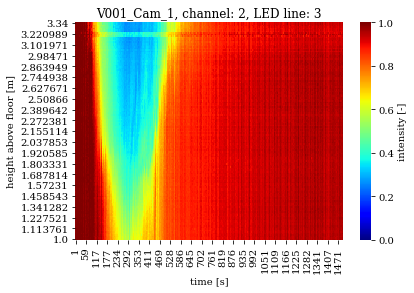

In [14]:
line = 3 # LED line
window_sim = 1 # Average window
n_ref = 10 # Number of reference images for normalizing
channel = 2 # Camera channel to analyse
min_time = 0 # Minimum datapoint
max_time = 1500 # Maximum datapoint

extco = sim_cam01.get_ledparams_at_line(channel,line,window=window_sim,n_ref=n_ref, yaxis='height').loc[min_time:max_time]
yticklabels = [1,1.5,2,2.5,3,3.35]
yticks = [10,20,30,40,50,60]

fig, ax = plt.subplots()
ax.set_ylim(1,3.35)
ax = sns.heatmap(extco.T, ax=ax, cmap='jet', vmin=0, vmax=1, cbar_kws={'label': 'intensity [-]'})
ax.invert_yaxis()
ax.set_title(f"{simulation}_Cam_{cam}, channel: {channel}, LED line: {line}")

ax.set_ylabel("height above floor [m]")
ax.set_xlabel("time [s]")

## Single LED analysis --> 2D

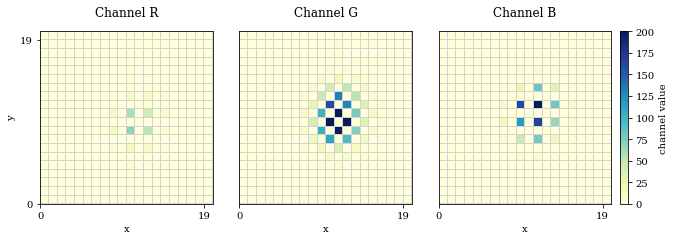

In [15]:
led_id = 0 # ID of LED
timestep = 31 # Timestep in seconds
radius = 10 # Radius around LED center to watch
vmin = 0 # Minimum Pixel value
vmax = 200 # Maximum Pixel value

red_channel_array = image_data.get_led_array(led_id, timestep, 0, radius)
green_channel_array = image_data.get_led_array(led_id, timestep, 1, radius)
blue_channel_array = image_data.get_led_array(led_id, timestep, 2, radius)

fig, (ax1, ax2, ax3, cax) = plt.subplots(ncols=4,figsize=(28*cm, 20*cm),
                  gridspec_kw={"width_ratios":[1,1,1, 0.1]})
fig.subplots_adjust(wspace=0.2)
cmap = 'YlGnBu'

im1  = ax1.pcolormesh(red_channel_array, cmap=cmap, vmin=vmin, vmax=vmax, edgecolors='lightgrey', linewidth=0.01)
ax1.set_aspect('equal')
im2  = ax2.pcolormesh(green_channel_array, cmap=cmap, vmin=vmin, vmax=vmax, edgecolors='lightgrey', linewidth=0.01)
ax2.set_aspect('equal')
im3  = ax3.pcolormesh(blue_channel_array, cmap=cmap, vmin=vmin, vmax=vmax, edgecolors='lightgrey', linewidth=0.01)
ax3.set_aspect('equal')

ticks = [0,19]
ax1.set_xticks(ticks)
ax2.set_xticks(ticks)
ax3.set_xticks(ticks)
ax1.set_yticks(ticks)
ax2.set_yticks([])
ax3.set_yticks([])
ax1.set_xlabel("x")
ax2.set_xlabel("x")
ax3.set_xlabel("x")
ax1.set_ylabel("y")
ax1.set_title("Channel R", pad=15)
ax2.set_title("Channel G", pad=15)
ax3.set_title("Channel B", pad=15)

ax.set_ylabel("y label")

ip = InsetPosition(ax3, [1.05,0,0.05,1])
cax.set_axes_locator(ip)

fig.colorbar(im1, cax=cax, ax=[ax,ax2,ax3],label="channel value")


# Plot Extinction Coefficients

## At Line/Layer Cam x Channel x (Time x Exctinctioncoefficient) --> 2D

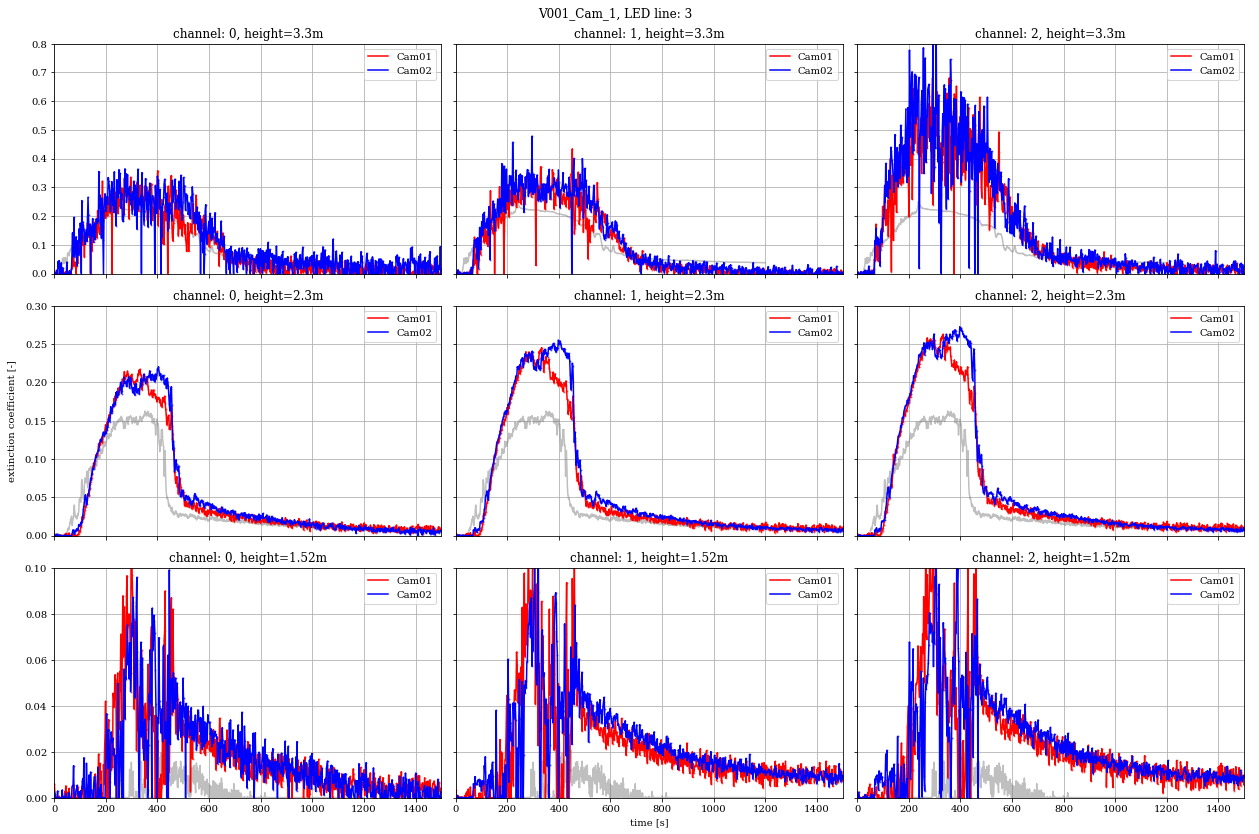

In [16]:
line = 3 # LED line
channel_list = [0,1,2] # Camera channel to analyse
height_list = [3.3,2.3,1.52]  # Heights to analyse
mirex_list = [mirex_data.mirex_1, mirex_data.mirex_2, mirex_data.mirex_3]

window_sim = 1 # Average window for simulation
window_mirex = 1 # Average window for MIREX

min_time = 0 # Minimum datapoint
max_time = 1500 # Maximum datapoint
y_lim_list = [0.8,0.3,0.1] # Y limits for plots at different heights
mirex_data.smooth_data(window_mirex)

n_rows = len(height_list)
n_cols = len(channel_list)

fig, axs = plt.subplots(nrows=n_rows, ncols=n_cols, sharex=True, sharey="row", figsize=(18, 12))
for ax, height, mirex, y_lim in zip(axs, height_list, mirex_list, y_lim_list):
    for channel in channel_list:
        layer = get_layer_from_height(1, 3.35, height, 20)
        cam01_extco = sim_cam01.get_extco_at_layer(channel,layer, window_sim)
        cam01_extco_org = sim_cam01.get_extco_at_layer(channel,layer, 1)
        cam02_extco = sim_cam02.get_extco_at_layer(channel,layer, window_sim)
        cam02_extco_org = sim_cam02.get_extco_at_layer(channel,layer, 1)

        ax[channel].plot(mirex, color='gray', alpha=0.5)
        ax[channel].plot(cam01_extco.index,cam01_extco.iloc[:,line], color='red', label="Cam01")
        ax[channel].scatter(cam01_extco_org.index, cam01_extco_org.iloc[:,line], color='red', s=1, alpha=0.5)
        ax[channel].plot(cam02_extco.iloc[:,line], color='blue',label="Cam02")
        ax[channel].scatter(cam02_extco_org.index, cam02_extco_org.iloc[:,line], color='blue', s=1, alpha=0.5)
        ax[channel].grid(True)
        ax[channel].set_xlim(min_time, max_time)
        ax[channel].set_title(f"channel: {channel}, height={height}m")
        ax[channel].legend(loc='upper right')
        ax[channel].set_ylim(0,y_lim)

fig.add_subplot(111, frameon=False)
fig.suptitle(f"{simulation}_Cam_{cam}, LED line: {line}")
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.xlabel("time [s]")
plt.ylabel("extinction coefficient [-]",labelpad=15)
plt.tight_layout()

## At Line/Layer Cam x Channel x (Time x Exctinctioncoefficient) --> 2D

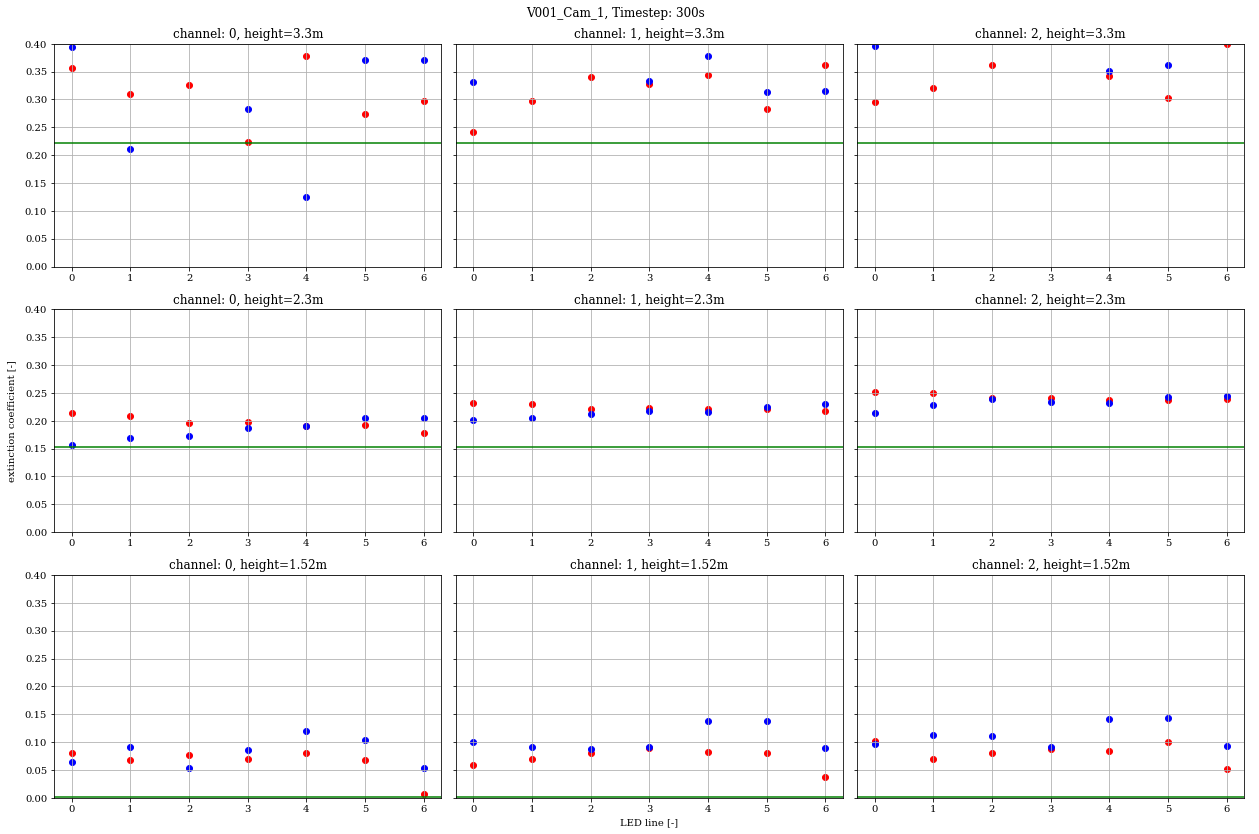

In [17]:
line = 3 # LED line
channel_list = [0,1,2] # Camera channel to analyse
height_list = [3.3,2.3,1.52]  # Heights to analyse

mirex_list = [mirex_data.mirex_1, mirex_data.mirex_2, mirex_data.mirex_3]
timestep = 300 # Timestep to analyse

window_sim = 1 # Average window for simulation
window_mirex = 1 # Average window for mirex
mirex_data.smooth_data(window_mirex)

n_rows = len(height_list)
n_cols = len(channel_list)

fig, axs = plt.subplots(nrows=n_rows, ncols=n_cols, sharey="row", figsize=(18, 12))
for ax, height, mirex in zip(axs, height_list, mirex_list):
    for channel in channel_list:
        layer = get_layer_from_height(1, 3.35, height, 20)
        cam01_extco = sim_cam01.get_extco_at_timestep(channel=channel,timestep=timestep, window=window_sim).loc[layer,:]
        cam02_extco = sim_cam02.get_extco_at_timestep(channel=channel,timestep=timestep, window=window_sim).loc[layer,:]
        ax[channel].scatter(cam01_extco.index, cam01_extco, color='red')
        ax[channel].scatter(cam02_extco.index, cam02_extco, color='blue')
        ax[channel].axhline(mirex[timestep], color = 'green')
        ax[channel].set_ylim(0,0.4)
        ax[channel].grid(True)
        ax[channel].set_title(f"channel: {channel}, height={height}m")

fig.add_subplot(111, frameon=False)
fig.suptitle(f"{simulation}_Cam_{cam}, Timestep: {timestep}s")
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.xlabel("LED line [-]")
plt.ylabel("extinction coefficient [-]",labelpad=15)
plt.tight_layout()

## At Line/Layer Cam x Channel x (Time x Exctinctioncoefficient) --> 2D

Text(0.5, 16.0, 'time [s]')

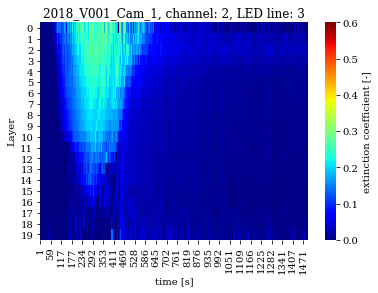

In [18]:
line = 3 # LED line
window_sim = 1 # Average window for simulation
min_layer = 0 # Bottom Layer
max_layer = 20 # Top Layer
min_time = 0 # Minimum datapoint
max_time = 1500 # Maximum datapoint

extco_red = sim_cam01.get_extco_at_line(channel=0,line=line, window=window_sim).loc[min_time:max_time,min_layer:max_layer]
extco_green = sim_cam01.get_extco_at_line(channel=1,line=line, window=window_sim).loc[min_time:max_time,min_layer:max_layer]
extco_blue = sim_cam01.get_extco_at_line(channel=2,line=line, window=window_sim).loc[min_time:max_time,min_layer:max_layer]

fig, ax = plt.subplots()
ax = sns.heatmap(extco_red.T,ax=ax, cmap='jet', vmin=0, vmax=0.6, cbar_kws={'label': 'extinction coefficient [-]'})
ax.set_title(f"{year}_{simulation}_Cam_{cam}, channel: {channel}, LED line: {line}")

ax.set_ylabel("Layer")
ax.set_xlabel("time [s]")

## At Line/Layer Cam x Channel x (Time x Relation of Exctinctioncoefficients) --> 2D

Text(0.5, 1.0, '2018_V001_Cam_1, timestep: 300')

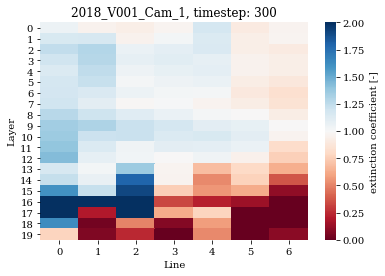

In [19]:
timestep = 300 # Timestep to analyse
window_sim = 10 # Average window for simulation
min_layer = 0 # Bottom Layer
max_layer = 20 # Top Layer


extco_red_1 = sim_cam01.get_extco_at_timestep(channel=0,timestep=timestep, window=window_sim).loc[min_layer:max_layer,:]
extco_red_2 = sim_cam02.get_extco_at_timestep(channel=0,timestep=timestep, window=window_sim).loc[min_layer:max_layer,:]
extco_compare = extco_red_1 / extco_red_2

fig, ax = plt.subplots()
ax = sns.heatmap(extco_compare, ax=ax, cmap='RdBu', vmin=0, vmax=2, cbar_kws={'label': 'extinction coefficient [-]'})
ax.set_title(f"{year}_{simulation}_Cam_{cam}, timestep: {timestep}")


## At Line/Layer Cam x Channel x (Time x Exctinctioncoefficient) --> 2D

Text(0.5, 1.0, '2018_V001_Cam_1, timestep: 300')

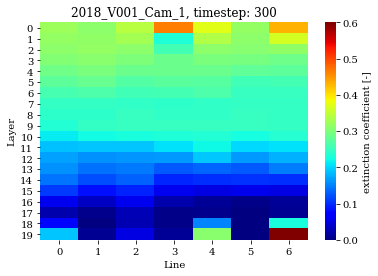

In [20]:
timestep = 300 # Timestep to analyse
window_sim = 10 # Average window for simulation
min_layer = 0 # Bottom Layer
max_layer = 20 # Top Layer

extco_red = sim_cam01.get_extco_at_timestep(channel=0,timestep=timestep, window=window_sim).loc[min_layer:max_layer,:]
extco_green = sim_cam01.get_extco_at_timestep(channel=1,timestep=timestep, window=window_sim).loc[min_layer:max_layer,:]
extco_blue = sim_cam01.get_extco_at_timestep(channel=2,timestep=timestep, window=window_sim).loc[min_layer:max_layer,:]

fig, ax = plt.subplots()
ax = sns.heatmap(extco_blue, ax=ax, cmap='jet', vmin=0, vmax=0.6, cbar_kws={'label': 'extinction coefficient [-]'})
ax.set_title(f"{year}_{simulation}_Cam_{cam}, timestep: {timestep}")

## At Line/Layer Cam x Channel x (Time x Exctinctioncoefficient) --> 2D

Text(0.5, 1.0, '2018_V001_Cam_1, channel: 2, layer: 0')

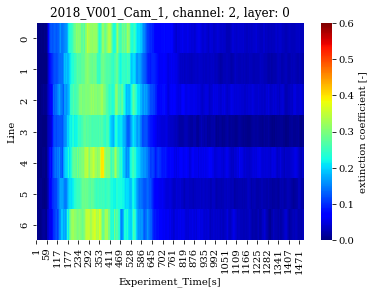

In [21]:
timestep = 300 # Timestep to analyse
window_sim = 10 # Average window for simulation
layer = 0 # Layer to analyse
min_time = 0 # Minimum datapoint
max_time = 1500 # Maximum datapoint

extco_red = sim_cam01.get_extco_at_layer(channel=0, layer=layer, window=window_sim).loc[min_time:max_time,:]
extco_green = sim_cam01.get_extco_at_layer(channel=1, layer=layer, window=window_sim).loc[min_time:max_time,:]
extco_blue = sim_cam01.get_extco_at_layer(channel=2, layer=layer, window=window_sim).loc[min_time:max_time,:]

fig, ax = plt.subplots()
sns.heatmap(extco_red.T, cmap='jet', vmin=0, vmax=0.6, cbar_kws={'label': 'extinction coefficient [-]'})
ax.set_title(f"{year}_{simulation}_Cam_{cam}, channel: {channel}, layer: {layer}")

## Color dependencies

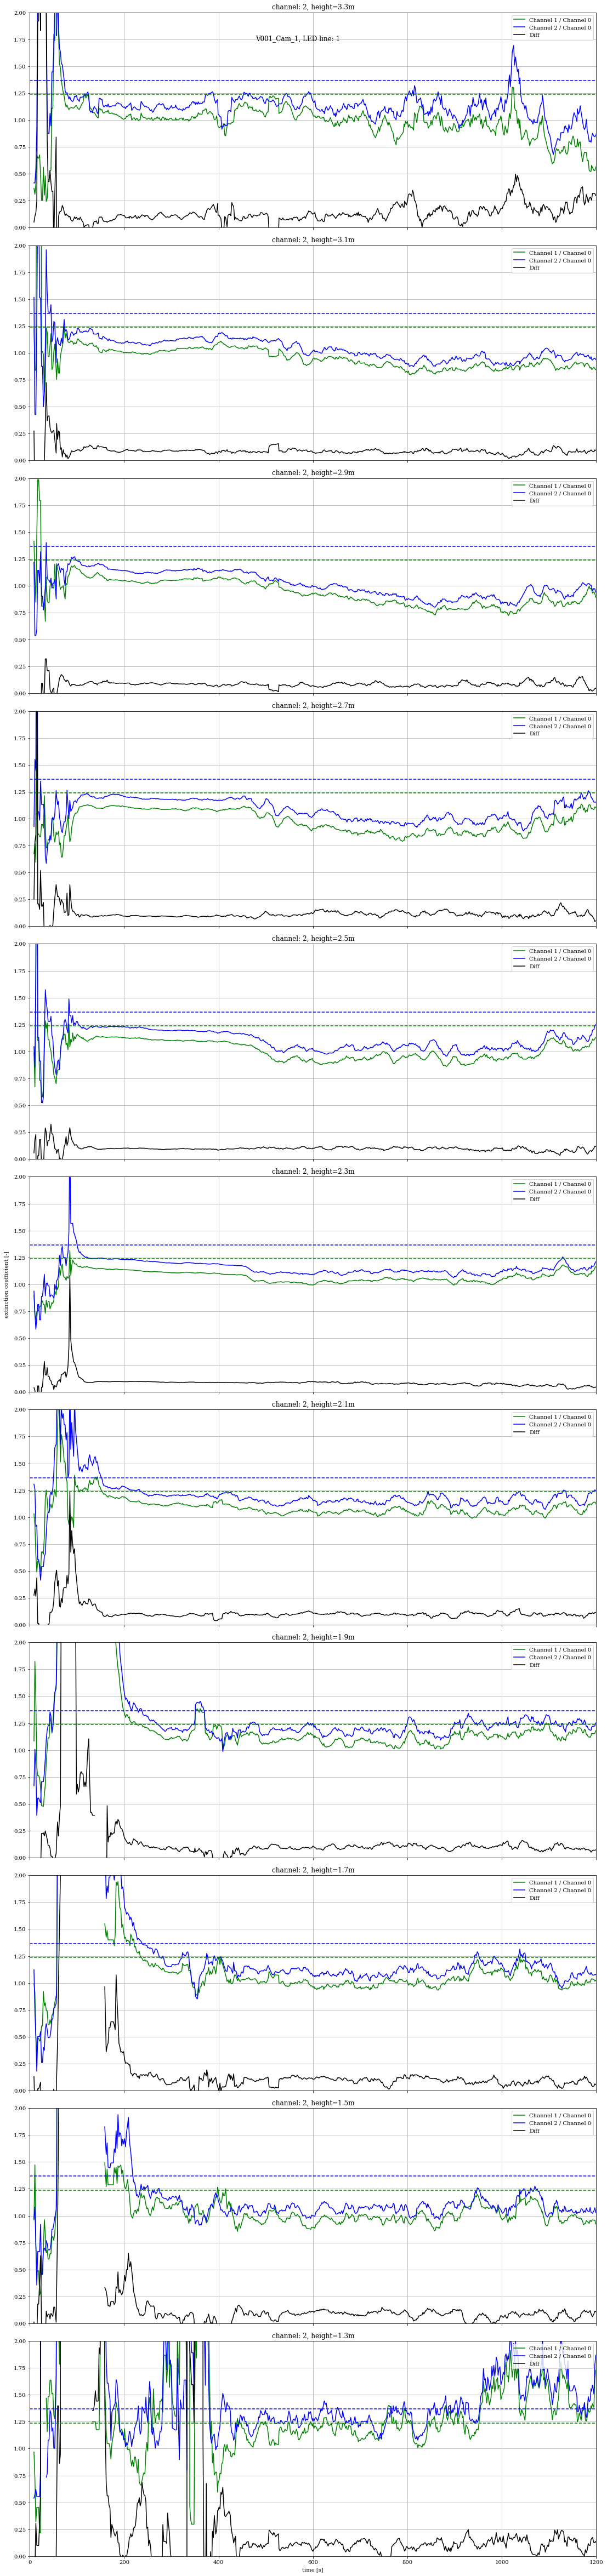

In [22]:
line = 1 # LED line
channel_list = [0,1,2] # Camera channel to analyse
height_list = [3.3,3.1,2.9,2.7,2.5,2.3,2.1,1.9,1.7,1.5,1.3]  # Heights to analyse

cam = 1
window_sim = 10 # Average window for simulation

min_time = 0 # Minimum datapoint
max_time = 1200 # Maximum datapoint

n_rows = len(height_list)

fig, axs = plt.subplots(nrows=n_rows, ncols=1, sharex=True, sharey="row")
fig.set_size_inches(16, 6*n_rows)

for ax, height, in zip(axs, height_list):
    layer = get_layer_from_height(1, 3.35, height, 20)
    sim = sim_cam01
    extco_0 = sim.get_extco_at_layer(0,layer, window_sim)
    extco_1 = sim.get_extco_at_layer(1,layer, window_sim)
    extco_2 = sim.get_extco_at_layer(2,layer, window_sim)
    rel_extco_1_0 = extco_1.loc[:,line] / extco_0.loc[:,line]
    rel_extco_2_0 = extco_2.loc[:,line] / extco_0.loc[:,line]
    diff_rel_1_rel_2 = rel_extco_2_0 - rel_extco_1_0
    ax.plot(extco_0.index,rel_extco_1_0, color='green', label="Channel 1 / Channel 0")
    ax.plot(extco_0.index,rel_extco_2_0, color='blue', label="Channel 2 / Channel 0")
    ax.plot(extco_0.index,diff_rel_1_rel_2, color='black', label="Diff")

    ax.axhline(y=1.367, color = 'blue', linestyle='--')
    ax.axhline(y=1.237, color = 'green', linestyle='--')
    ax.grid(True)
    ax.set_xlim(min_time, max_time)
    ax.set_title(f"channel: {channel}, height={height}m")
    ax.legend(loc='upper right')
    ax.set_ylim(0,2)

fig.add_subplot(111, frameon=False)
fig.suptitle(f"{simulation}_Cam_{cam}, LED line: {line}")
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.xlabel("time [s]")
plt.ylabel("extinction coefficient [-]",labelpad=15)
plt.tight_layout()